In [1]:
import numpy as np 
import random
import time 
import resource
import matplotlib.pyplot as plt 

**The Objective Function**

In [2]:
def equation(x, y):
    return 4 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) - \
        15 * (x / 5 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2) - \
        (1./3)*np.exp(-(x+1)**2 - y**2)-1*(2*(x-3)**7 -
                                           0.3*(y-4)**5+(y-3)**9)*np.exp(-(x-3)**2-(y-3)**2) 

**Finding the Partial Derivatives** 

In [3]:
def fitness(x, y):
    ans = equation(x, y) 
    if ans > 12.235:
        return 1000
    else:
        return abs(ans)

**Experiment 1:** Comapring various parameters for GA with uniform and one-point crossover  

In [4]:
# GA with uniform cross over 
def GA_Uniform(population_size, cross_over, mutation_rate):
    # Counts the number of generations in order to reach global maximum 
    iterations = 0
    # Adjust the muations rate 
    mutation_rate/=2
    # Generate Solutions 
    solutions = [(0,0)]   
    for s in range(population_size):
        # Add tupples to list with random values from 0 to 10,000
        solutions.append((random.uniform(-3,7), 
                          random.uniform(-3,7)))
    # Genetic Algorithm 
    # Rank the solutions 
    for i in range(1000):
        iterations += 1
        ranked_solutions = []
        for s in solutions:
            ranked_solutions.append((fitness(s[0], s[1]), s))

        ranked_solutions.sort()
        ranked_solutions.reverse()

        # Uncomment to view optimal height for each generation 
        #print(f"===== Generation {i} best solutions ====")
        #print(ranked_solutions[0])

        # Select best solutions for crossover 
        cross_over *= population_size
        cross_over = int(cross_over)
        best_solutions = ranked_solutions[0:cross_over]

        # Add random solutions to list for mutation 
        elements = []
        for s in best_solutions:
            elements.append(s[1][0])
            elements.append(s[1][1])


        # Create a new generation i.e. mutation
        new_gen = []
        for _ in range(1000):
          # Uniform crossover performed 
            e1 = random.choice(elements) * random.uniform(1-mutation_rate, 1+mutation_rate)
            e2 = random.choice(elements) * random.uniform(1-mutation_rate, 1+mutation_rate)

            new_gen.append((e1,e2))

        # Break loop if global maxima is reached 
        if ranked_solutions[0][0] > 500:
            break
        # Update the new generation 
        solutions = new_gen

    # Calculate the global maximum 
    _, chromosomes = ranked_solutions[0]
    x,y = chromosomes
    height = equation(x, y)

    return height, iterations

In [5]:
"""Results from uniform crossover"""
# lists to hold the heights for different paramerters 
h20 = []
h30 = []
h50 = []
h80 = []
h100 = []
# lists to hold the number of generations for different paramerters 
i20 = []
i30 = []
i50 = []
i80 = []
i100 = []

# Run algorithm 100 time for better accuracy 
epochs = 100
# Run algorithm and collect data 
for i in range(epochs):
    height, iterations = GA_Uniform(20, 0.9, 0.5)
    h20.append(height)
    i20.append(iterations)
    
    height, iterations = GA_Uniform(30, 0.8, 0.45)
    h30.append(height)
    i30.append(iterations)
    
    height, iterations = GA_Uniform(50, 0.8, 0.4)
    h50.append(height)
    i50.append(iterations)
    
    height, iterations = GA_Uniform(80, 0.6, 0.1)
    h80.append(height)
    i80.append(iterations)
    
    height, iterations = GA_Uniform(100, 0.5, 0.1)
    h100.append(height)
    i100.append(iterations)

# Display Results 
print("===== Summary=====")

print("Population Size: 20", "Crossover Rate: 0.9", "Mutation Rate: 0.5")
print("Average Height",sum(h20)/len(h20), "Average Iterations (generations):", sum(i20)/len(i20), "Success Rate:", (len(i20)-i20.count(1000))/len(i20))
print()
print("Population Size: 30", "Crossover Rate: 0.8", "Mutation Rate: 0.45")
print("Average Height",sum(h30)/len(h30), "Average Iterations (generations):", sum(i30)/len(i30), "Success Rate:", (len(i30)-i30.count(1000))/len(i30))
print()
print("Population Size: 50", "Crossover Rate: 0.8", "Mutation Rate: 0.4")
print("Average Height",sum(h50)/len(h50), "Average Iterations (generations):", sum(i50)/len(i50), "Success Rate:", (len(i50)-i50.count(1000))/len(i50))
print()
print("Population Size: 80", "Crossover Rate: 0.6", "Mutation Rate: 0.1")
print("Average Height",sum(h80)/len(h80), "Average Iterations (generations):", sum(i80)/len(i80), "Success Rate:", (len(i80)-i80.count(1000))/len(i80))
print()
print("Population Size: 100", "Crossover Rate: 0.5", "Mutation Rate: 0.1")
print("Average Height",sum(h100)/len(h100), "Average Iterations (generations):", sum(i100)/len(i100), "Success Rate:", (len(i100)-i100.count(1000))/len(i100))

===== Summary=====
Population Size: 20 Crossover Rate: 0.9 Mutation Rate: 0.5
Average Height 12.235112858269652 Average Iterations (generations): 17.49 Success Rate: 1.0

Population Size: 30 Crossover Rate: 0.8 Mutation Rate: 0.45
Average Height 12.235114150965268 Average Iterations (generations): 26.42 Success Rate: 1.0

Population Size: 50 Crossover Rate: 0.8 Mutation Rate: 0.4
Average Height 11.586188025403844 Average Iterations (generations): 109.14 Success Rate: 0.97

Population Size: 80 Crossover Rate: 0.6 Mutation Rate: 0.1
Average Height 11.666584844847439 Average Iterations (generations): 344.02 Success Rate: 0.68

Population Size: 100 Crossover Rate: 0.5 Mutation Rate: 0.1
Average Height 10.866168309306913 Average Iterations (generations): 355.96 Success Rate: 0.67


In [7]:
# One point crossover 
def GA_OnePoint(population_size, cross_over, mutation_rate):
    iterations = 0
    
    mutation_rate/=2
    # Generate Solutions 
    solutions = [(0,0)]   
    for s in range(population_size):
        # Add tupples to list with random values from 0 to 10,000
        solutions.append((random.uniform(-3,7), 
                          random.uniform(-3,7)))
    # Genetic Algorithm 
    # Rank best solutions 
    for i in range(1000):
        iterations += 1
        ranked_solutions = []
        for s in solutions:
            ranked_solutions.append((fitness(s[0], s[1]), s))

        ranked_solutions.sort()
        ranked_solutions.reverse()

        # uncomment to display heights for each generation  
        #print(f"===== Generation {i} best solutions ====")
        #print(ranked_solutions[0])

        # Select top  solutions for crossover 
        cross_over *= population_size
        cross_over = int(cross_over)
        best_solutions = ranked_solutions[0:cross_over]

        # Create a new generation i.e. mutation
        elements = []
        # Add random solutions to list for mutation 
        for s in best_solutions:
            elements.append([s[1][0], s[1][1]])
            


        # Create a new generation i.e. mutation
        new_gen = []
        for _ in range(1000):
        # One point crossover performed 
            e = random.choice(elements)
            ee = random.choice(elements)
            e1 = e[0] * random.uniform(1-mutation_rate, 1+mutation_rate)
            e2 = ee[1] * random.uniform(1-mutation_rate, 1+mutation_rate)
            e3 = e[1] * random.uniform(1-mutation_rate, 1+mutation_rate)
            e4 = ee[0] * random.uniform(1-mutation_rate, 1+mutation_rate)
            new_gen.append((e1,e2))
            new_gen.append((e3,e4))
        # If global maxima is reached break from the loop 
        if ranked_solutions[0][0] > 500:
            break
        # update new generation 
        solutions = new_gen


    # Calculate the gloabl 

    _, chromosomes = ranked_solutions[0]
    x,y = chromosomes
    height = equation(x, y)
    return height, iterations

In [11]:
"""Results from one point crossover"""
# lists to hold the heights for different paramerters 
h20 = []
h30 = []
h50 = []
h80 = []
h100 = []
# lists to hold the number of generations for different paramerters 
i20 = []
i30 = []
i50 = []
i80 = []
i100 = []

# Run algorithm 100 time for better accuracy 
epochs = 100
# Run algorithm and collect data 
for i in range(epochs):
    height, iterations = GA_OnePoint(20, 0.9, 0.5)
    h20.append(height)
    i20.append(iterations)
    
    height, iterations = GA_OnePoint(30, 0.8, 0.45)
    h30.append(height)
    i30.append(iterations)
    
    height, iterations = GA_OnePoint(50, 0.8, 0.4)
    h50.append(height)
    i50.append(iterations)
    
    height, iterations = GA_OnePoint(80, 0.6, 0.1)
    h80.append(height)
    i80.append(iterations)
    
    height, iterations = GA_OnePoint(100, 0.5, 0.1)
    h100.append(height)
    i100.append(iterations)

# Display Results     
print("===== Summary=====")

print("Population Size: 20", "Crossover Rate: 0.9", "Mutation Rate: 0.5")
print("Average Height",sum(h20)/len(h20), "Average Iterations (generations):", sum(i20)/len(i20), "Success Rate:", (len(i20)-i20.count(1000))/len(i20))
print()
print("Population Size: 30", "Crossover Rate: 0.8", "Mutation Rate: 0.45")
print("Average Height",sum(h30)/len(h30), "Average Iterations (generations):", sum(i30)/len(i30), "Success Rate:", (len(i30)-i30.count(1000))/len(i30))
print()
print("Population Size: 50", "Crossover Rate: 0.8", "Mutation Rate: 0.4")
print("Average Height",sum(h50)/len(h50), "Average Iterations (generations):", sum(i50)/len(i50), "Success Rate:", (len(i50)-i50.count(1000))/len(i50))
print()
print("Population Size: 80", "Crossover Rate: 0.6", "Mutation Rate: 0.1")
print("Average Height",sum(h80)/len(h80), "Average Iterations (generations):", sum(i80)/len(i80), "Success Rate:", (len(i80)-i80.count(1000))/len(i80))
print()
print("Population Size: 100", "Crossover Rate: 0.5", "Mutation Rate: 0.1")
print("Average Height",sum(h100)/len(h100), "Average Iterations (generations):", sum(i100)/len(i100), "Success Rate:", (len(i100)-i100.count(1000))/len(i100))

===== Summary=====
Population Size: 20 Crossover Rate: 0.9 Mutation Rate: 0.5
Average Height 12.235166778316072 Average Iterations (generations): 2.0 Success Rate: 1.0

Population Size: 30 Crossover Rate: 0.8 Mutation Rate: 0.45
Average Height 12.235136575628275 Average Iterations (generations): 6.0 Success Rate: 1.0

Population Size: 50 Crossover Rate: 0.8 Mutation Rate: 0.4
Average Height 12.2350827126167 Average Iterations (generations): 16.0 Success Rate: 1.0

Population Size: 80 Crossover Rate: 0.6 Mutation Rate: 0.1
Average Height 12.235167934141089 Average Iterations (generations): 12.0 Success Rate: 1.0

Population Size: 100 Crossover Rate: 0.5 Mutation Rate: 0.1
Average Height 12.235070032531311 Average Iterations (generations): 21.0 Success Rate: 1.0


**Experiment 2:** Comparing the compuational performance for one point cross over and unform crossover 

In [8]:
# list to store the heights and number of generations to reach global maximum 
h20 = []
i20 = []
# Total number of times algorithm is ran 
epochs = 1000  
# Calculating start time of computaion 
time_start = time.perf_counter()

# loop and collect data 
for i in range(epochs):
    height, iterations = GA_OnePoint(20, 0.9, 0.5)
    h20.append(height)
    i20.append(iterations)

# Calculate time    
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
# Display resuts 
print ("time", time_elapsed, memMb, "MByte")   
print("Population Size: 20", "Crossover Rate: 0.9", "Mutation Rate: 0.5")
print("Average Height",sum(h20)/len(h20), "Average Iterations (generations):", sum(i20)/len(i20), "Success Rate:", (len(i20)-i20.count(1000))/len(i20))
print()

time 249.9634051390001 0.11417770385742188 MByte
Population Size: 20 Crossover Rate: 0.9 Mutation Rate: 0.5
Average Height 12.23511454196231 Average Iterations (generations): 10.413 Success Rate: 1.0



In [12]:
# list to store the heights and number of generations to reach global maximum 
h20 = []
i20 = []
# Total number of times algorithm is ran 
epochs = 1000
# Calculating start time of computaion 
time_start = time.perf_counter()

# loop and collect data
for i in range(epochs):
    height, iterations = GA_Uniform(20, 0.9, 0.5)
    h20.append(height)
    i20.append(iterations)
    
# Calculate time    
time_elapsed = (time.perf_counter() - time_start)
memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
# Display resuts 
print ("time", time_elapsed, memMb, "MByte")    
print("Population Size: 20", "Crossover Rate: 0.9", "Mutation Rate: 0.5")
print("Average Height",sum(h20)/len(h20), "Average Iterations (generations):", sum(i20)/len(i20), "Success Rate:", (len(i20)-i20.count(1000))/len(i20))
print()

time 0.06776854800000365 0.11427688598632812 MByte
Population Size: 20 Crossover Rate: 0.9 Mutation Rate: 0.5
Average Height 12.235089138047512 Average Iterations (generations): 5.0 Success Rate: 1.0



**Experiment 3:** Plotting Convergance  

In [13]:
"""Returns heights using uniform cross over (check algorithms above for commenting)"""
def GA_Uniform_plot(population_size, cross_over, mutation_rate):
    iterations = 0
    mutation_rate/=2
    heights = []
    # Generate Solutions 
    solutions = [(0,0)]   
    for s in range(population_size):
        solutions.append((random.uniform(-3,7), 
                          random.uniform(-3,7)))
    # Genetic Algorithm 
    for i in range(1000):
        iterations += 1
        ranked_solutions = []
        for s in solutions:
            ranked_solutions.append((fitness(s[0], s[1]), s))

        ranked_solutions.sort()
        ranked_solutions.reverse()


        #print(f"===== Generation {i} best solutions ====")
        #print(ranked_solutions[0])

        cross_over *= population_size
        cross_over = int(cross_over)
        best_solutions = ranked_solutions[0:cross_over]

        elements = []
        for s in best_solutions:
            elements.append(s[1][0])
            elements.append(s[1][1])

        new_gen = []
        for _ in range(1000):
            e1 = random.choice(elements) * random.uniform(1-mutation_rate, 1+mutation_rate)
            e2 = random.choice(elements) * random.uniform(1-mutation_rate, 1+mutation_rate)

            new_gen.append((e1,e2))

        solutions = new_gen
        _, chromosomes = ranked_solutions[0]
        x,y = chromosomes
        height = equation(x, y)
        heights.append(height)
        if ranked_solutions[0][0] > 500:
            break
    
    return heights


    

In [14]:
"""Returns heights using one point cross over (check algorithms above for commenting)"""
def GA_OnePoint_plot(population_size, cross_over, mutation_rate):
    iterations = 0
    heights = []
    mutation_rate/=2
    # Generate Solutions 
    solutions = [(0,0)]   
    for s in range(population_size):
        solutions.append((random.uniform(-3,7), 
                          random.uniform(-3,7)))
    # Genetic Algorithm 
    for i in range(1000):
        iterations += 1
        ranked_solutions = []
        for s in solutions:
            ranked_solutions.append((fitness(s[0], s[1]), s))

        ranked_solutions.sort()
        ranked_solutions.reverse()

        #print(f"===== Generation {i} best solutions ====")
        #print(ranked_solutions[0])

        cross_over *= population_size
        cross_over = int(cross_over)
        best_solutions = ranked_solutions[0:cross_over]

        elements = []
        for s in best_solutions:
            elements.append([s[1][0], s[1][1]])

        new_gen = []
        for _ in range(1000):
            e = random.choice(elements)
            ee = random.choice(elements)
            e1 = e[0] * random.uniform(1-mutation_rate, 1+mutation_rate)
            e2 = ee[1] * random.uniform(1-mutation_rate, 1+mutation_rate)
            e3 = e[1] * random.uniform(1-mutation_rate, 1+mutation_rate)
            e4 = ee[0] * random.uniform(1-mutation_rate, 1+mutation_rate)
            new_gen.append((e1,e2))
            new_gen.append((e3,e4))
        solutions = new_gen
        
        _, chromosomes = ranked_solutions[0]
        x,y = chromosomes
        height = equation(x, y)
        heights.append(height)
        if ranked_solutions[0][0] > 500:
            break
    
    return heights

Run to view plot of convergance 

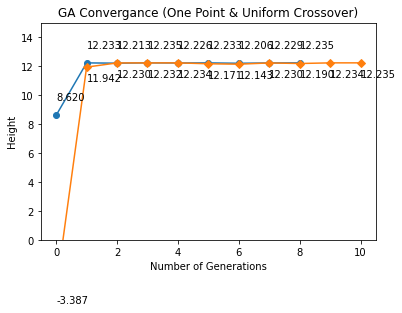

In [15]:
# One point crossover 
y_one = GA_OnePoint_plot(20, 0.9, 0.5)
x_one = range(len(y_one))
# Uniform crossover 
y_uniform = GA_Uniform_plot(20, 0.9, 0.5)
x_uniform = range(len(y_uniform))
# plotting
plt.plot(x_one,y_one, marker = "o")
plt.plot(x_uniform,y_uniform, marker = "D")
# Adding coordinates 
for i, j in zip(x_one, y_one):
   plt.text(i, j+1, '{}'.format(format(j,".3f")))

for i, j in zip(x_uniform, y_uniform):
   plt.text(i, j-1, '{}'.format(format(j,".3f")))
# Adding labels 
plt.ylim(0, 15)
plt.ylabel("Height")
plt.xlabel("Number of Generations")
plt.title("GA Convergance (One Point & Uniform Crossover)")
plt.show()
